In [1]:
# 지피유 확인!!
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
2


In [2]:
torch.__version__

'1.4.0'

In [3]:
!pwd

/home/ubuntu/jonghee


In [4]:
%cd ./gitclone/Informer2020

/home/ubuntu/jonghee/gitclone/Informer2020


In [5]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np
import time

from sklearn.model_selection import GroupKFold
from sklearn import metrics

sub = pd.read_csv('../../dataset/sample_submission.csv')
train = pd.read_csv('../../dataset/train.csv')
test = pd.read_csv('../../dataset/test.csv')

In [7]:
train.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [8]:
test.tail()

,id,breath_id,R,C,time_step,u_in,u_out
4023995,4023996,125748,20,10,2.530117,4.971245,1
4023996,4023997,125748,20,10,2.563853,4.975709,1
4023997,4023998,125748,20,10,2.597475,4.979468,1
4023998,4023999,125748,20,10,2.631134,4.982648,1
4023999,4024000,125748,20,10,2.665301,4.985373,1


## 인포머에 넣을 수 있는 형태로 데이터 가공하기

1번째 컬럼은 date이여야하며 datetime형태여야한다.

https://min23th.tistory.com/24

### 날짜 변환

In [9]:
train = train.reset_index()
train = train.rename(columns={'index':'date'})
train

,date,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,0,1,1,20,50,0.000000,0.083334,0,5.837492
1,1,2,1,20,50,0.033652,18.383041,0,5.907794
2,2,3,1,20,50,0.067514,22.509278,0,7.876254
3,3,4,1,20,50,0.101542,22.808822,0,11.742872
4,4,5,1,20,50,0.135756,25.355850,0,12.234987
5,5,6,1,20,50,0.169698,27.259866,0,12.867706
6,6,7,1,20,50,0.203708,27.127486,0,14.695562
7,7,8,1,20,50,0.237723,26.807732,0,15.890699
8,8,9,1,20,50,0.271776,27.864715,0,15.539188
9,9,10,1,20,50,0.305732,28.313036,0,15.750094


In [10]:
import datetime

def change_index_to_date(value):
    date = datetime.datetime.fromtimestamp(int(value)).strftime('%Y-%m-%d %H:%M:%S')
    return date

train.date = train.date.apply(lambda x: change_index_to_date(x))
train.drop('id', axis=1, inplace=True)
train

,date,breath_id,R,C,time_step,u_in,u_out,pressure
0,1970-01-01 09:00:00,1,20,50,0.000000,0.083334,0,5.837492
1,1970-01-01 09:00:01,1,20,50,0.033652,18.383041,0,5.907794
2,1970-01-01 09:00:02,1,20,50,0.067514,22.509278,0,7.876254
3,1970-01-01 09:00:03,1,20,50,0.101542,22.808822,0,11.742872
4,1970-01-01 09:00:04,1,20,50,0.135756,25.355850,0,12.234987
5,1970-01-01 09:00:05,1,20,50,0.169698,27.259866,0,12.867706
6,1970-01-01 09:00:06,1,20,50,0.203708,27.127486,0,14.695562
7,1970-01-01 09:00:07,1,20,50,0.237723,26.807732,0,15.890699
8,1970-01-01 09:00:08,1,20,50,0.271776,27.864715,0,15.539188
9,1970-01-01 09:00:09,1,20,50,0.305732,28.313036,0,15.750094


In [11]:
# 모델에 넣기 위해선 csv로 저장을 해놔야한다!
train.to_csv('./dataset/sample_train.csv', index=False)
pd.read_csv('./dataset/sample_train.csv')

,date,breath_id,R,C,time_step,u_in,u_out,pressure
0,1970-01-01 09:00:00,1,20,50,0.000000,0.083334,0,5.837492
1,1970-01-01 09:00:01,1,20,50,0.033652,18.383041,0,5.907794
2,1970-01-01 09:00:02,1,20,50,0.067514,22.509278,0,7.876254
3,1970-01-01 09:00:03,1,20,50,0.101542,22.808822,0,11.742872
4,1970-01-01 09:00:04,1,20,50,0.135756,25.355850,0,12.234987
5,1970-01-01 09:00:05,1,20,50,0.169698,27.259866,0,12.867706
6,1970-01-01 09:00:06,1,20,50,0.203708,27.127486,0,14.695562
7,1970-01-01 09:00:07,1,20,50,0.237723,26.807732,0,15.890699
8,1970-01-01 09:00:08,1,20,50,0.271776,27.864715,0,15.539188
9,1970-01-01 09:00:09,1,20,50,0.305732,28.313036,0,15.750094


## 모델 훈련시키기

https://min23th.tistory.com/24

In [6]:
%cd /home/ubuntu/jonghee/gitclone/Informer2020

/home/ubuntu/jonghee/gitclone/Informer2020


In [7]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

In [8]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'custom' # data
args.root_path = '../../dataset/' # root path of data file
args.data_path = 'sample_train.csv' # data file
args.features = 'MS' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'pressure' # target feature in S or MS task
args.freq = 's' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 80 # input sequence length of Informer encoder, 한 breath_id마다 80개의 데이터라서
args.label_len = 40 # start token length of Informer decoder, 예제 코드보니까 seq_len의 반이라서...
args.pred_len = 20 # prediction sequence length, 이건 또 label_len의 반이라서...
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

args.enc_in = 7 # encoder input size
args.dec_in = 7 # decoder input size
args.c_out = 1 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 's' # 오잉 왜 h로 돼있었지??

args.batch_size = 1024
args.learning_rate = 0.0001
args.loss = 'mae'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 5
args.patience = 3
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = True
args.devices = '0,1'


In [9]:
True if torch.cuda.is_available() else False

True

In [10]:
args.use_gpu = True if torch.cuda.is_available() and args.use_gpu else False

if args.use_gpu and args.use_multi_gpu:
    args.devices = args.devices.replace(' ','')
    device_ids = args.devices.split(',')
    args.device_ids = [int(id_) for id_ in device_ids]
    args.gpu = args.device_ids[0]

In [11]:
# Set augments by using data name
data_parser = {
    'custom':{'data':'sample_train.csv','T':'pressure','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
}
if args.data in data_parser.keys():
    data_info = data_parser[args.data]
    args.data_path = data_info['data']
    args.target = data_info['T']
    args.enc_in, args.dec_in, args.c_out = data_info[args.features]

In [12]:
data_info

{'data': 'sample_train.csv',
 'T': 'pressure',
 'M': [7, 7, 7],
 'S': [1, 1, 1],
 'MS': [7, 7, 1]}

In [13]:
args.detail_freq = args.freq
args.freq = args.freq[-1:]

In [14]:
print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'custom', 'root_path': '../../dataset/', 'data_path': 'sample_train.csv', 'features': 'MS', 'target': 'pressure', 'freq': 's', 'checkpoints': './informer_checkpoints', 'seq_len': 80, 'label_len': 40, 'pred_len': 20, 'enc_in': 7, 'dec_in': 7, 'c_out': 1, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 2, 'd_layers': 1, 'd_ff': 2048, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'distil': True, 'output_attention': False, 'mix': True, 'padding': 0, 'batch_size': 1024, 'learning_rate': 0.0001, 'loss': 'mae', 'lradj': 'type1', 'use_amp': False, 'num_workers': 0, 'itr': 1, 'train_epochs': 5, 'patience': 3, 'des': 'exp', 'use_gpu': True, 'gpu': 0, 'use_multi_gpu': True, 'devices': '0,1', 'device_ids': [0, 1], 'detail_freq': 's'}


In [15]:
Exp = Exp_Informer

In [16]:
range(args.itr)

range(0, 1)

In [78]:
!nvidia-smi

Sun Oct 31 11:25:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  On   | 00000000:00:06.0 Off |                    0 |
| N/A   58C    P0    49W / 250W |  20280MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-PCIE...  On   | 00000000:00:07.0 Off |                    0 |
| N/A   58C    P0    48W / 250W |  15332MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [79]:
for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_fc{}_eb{}_dt{}_mx{}_{}_{}'.format(args.model, args.data, args.features, 
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.factor, args.embed, args.distil, args.mix, args.des, ii)

    # set experiments
    exp = Exp(args)
    
    # train
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)
    
    # test
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    torch.cuda.empty_cache()

Use GPU: cuda:0
>>>>>>>start training : informer_custom_ftMS_sl80_ll40_pl20_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 4225101
val 603581
test 1207181
	iters: 100, epoch: 1 | loss: 0.2584030
	speed: 0.4081s/iter; left time: 8379.4949s
	iters: 200, epoch: 1 | loss: 0.2184187
	speed: 0.4044s/iter; left time: 8263.2947s
	iters: 300, epoch: 1 | loss: 0.1912134
	speed: 0.4015s/iter; left time: 8163.3527s
	iters: 400, epoch: 1 | loss: 0.2103897
	speed: 0.4031s/iter; left time: 8155.8601s
	iters: 500, epoch: 1 | loss: 0.2201923
	speed: 0.4046s/iter; left time: 8145.9864s
	iters: 600, epoch: 1 | loss: 0.1732580
	speed: 0.4046s/iter; left time: 8103.9405s
	iters: 700, epoch: 1 | loss: 0.1764579
	speed: 0.4041s/iter; left time: 8054.5727s
	iters: 800, epoch: 1 | loss: 0.1772738
	speed: 0.4036s/iter; left time: 8003.4861s
	iters: 900, epoch: 1 | loss: 0.1904016
	speed: 0.4042s/iter; left time: 7974.8921s
	iters: 1000, epoch: 1 | loss: 0.1630615

	iters: 800, epoch: 3 | loss: 0.1320237
	speed: 0.4027s/iter; left time: 4662.3063s
	iters: 900, epoch: 3 | loss: 0.1697001
	speed: 0.3986s/iter; left time: 4575.3713s
	iters: 1000, epoch: 3 | loss: 0.1623878
	speed: 0.4043s/iter; left time: 4601.0123s
	iters: 1100, epoch: 3 | loss: 0.1458601
	speed: 0.3994s/iter; left time: 4504.5772s
	iters: 1200, epoch: 3 | loss: 0.1359656
	speed: 0.4063s/iter; left time: 4542.0409s
	iters: 1300, epoch: 3 | loss: 0.1537200
	speed: 0.4036s/iter; left time: 4470.9985s
	iters: 1400, epoch: 3 | loss: 0.1629066
	speed: 0.4018s/iter; left time: 4411.8192s
	iters: 1500, epoch: 3 | loss: 0.1444196
	speed: 0.4045s/iter; left time: 4400.2896s
	iters: 1600, epoch: 3 | loss: 0.1536491
	speed: 0.4016s/iter; left time: 4328.8900s
	iters: 1700, epoch: 3 | loss: 0.1631998
	speed: 0.4053s/iter; left time: 4328.1661s
	iters: 1800, epoch: 3 | loss: 0.1429658
	speed: 0.4042s/iter; left time: 4276.0095s
	iters: 1900, epoch: 3 | loss: 0.1873664
	speed: 0.4063s/iter; left

	iters: 1800, epoch: 5 | loss: 0.1631688
	speed: 0.4048s/iter; left time: 942.0349s
	iters: 1900, epoch: 5 | loss: 0.1273647
	speed: 0.4017s/iter; left time: 894.5476s
	iters: 2000, epoch: 5 | loss: 0.1388123
	speed: 0.4033s/iter; left time: 857.7764s
	iters: 2100, epoch: 5 | loss: 0.1683924
	speed: 0.4057s/iter; left time: 822.3443s
	iters: 2200, epoch: 5 | loss: 0.1379149
	speed: 0.3986s/iter; left time: 768.1502s
	iters: 2300, epoch: 5 | loss: 0.1219838
	speed: 0.4025s/iter; left time: 735.4442s
	iters: 2400, epoch: 5 | loss: 0.1375627
	speed: 0.4021s/iter; left time: 694.4518s
	iters: 2500, epoch: 5 | loss: 0.1317115
	speed: 0.4025s/iter; left time: 654.8262s
	iters: 2600, epoch: 5 | loss: 0.1319851
	speed: 0.4013s/iter; left time: 612.7357s
	iters: 2700, epoch: 5 | loss: 0.1777903
	speed: 0.3984s/iter; left time: 568.4917s
	iters: 2800, epoch: 5 | loss: 0.1435583
	speed: 0.4026s/iter; left time: 534.2688s
	iters: 2900, epoch: 5 | loss: 0.1216049
	speed: 0.3992s/iter; left time: 48

## 훈련 결과 시각화

In [16]:
import os

setting = 'informer_custom_ftMS_sl80_ll40_pl20_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'

In [17]:
exp = Exp(args)

exp.predict(setting, True)

Use GPU: cuda:0
pred 1


In [19]:
import numpy as np

prediction = np.load('./results/'+setting+'/real_prediction.npy')

prediction.shape

(1, 20, 1)

In [20]:
prediction

array([[[-0.7511434 ],
        [-0.5971155 ],
        [-0.12678403],
        [ 0.24300608],
        [ 0.3467427 ],
        [ 0.35367033],
        [ 0.46403787],
        [ 0.616618  ],
        [ 0.6793562 ],
        [ 0.74355143],
        [ 0.793165  ],
        [ 0.83743453],
        [ 0.8789858 ],
        [ 0.9759067 ],
        [ 1.0111496 ],
        [ 1.0387732 ],
        [ 1.0722479 ],
        [ 1.1098397 ],
        [ 1.1282569 ],
        [ 1.141288  ]]], dtype=float32)

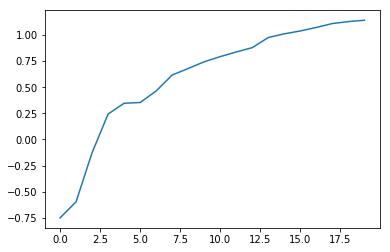

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(prediction[0,:,-1])
plt.show()

In [22]:
from data.data_loader import Dataset_Pred
from torch.utils.data import DataLoader

In [88]:
Data = Dataset_Pred
timeenc = 0 if args.embed!='timeF' else 1
flag = 'pred'; shuffle_flag = False; drop_last = False; batch_size = 1

freq = args.detail_freq

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    target=args.target,
    timeenc=timeenc,
    freq=freq
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [89]:
len(data_set), len(data_loader)

(1, 1)

In [90]:
preds = np.load('./results/'+setting+'/pred.npy')
trues = np.load('./results/'+setting+'/true.npy')

# [samples, pred_len, dimensions]
preds.shape, trues.shape

((1206272, 20, 1), (1206272, 20, 1))

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

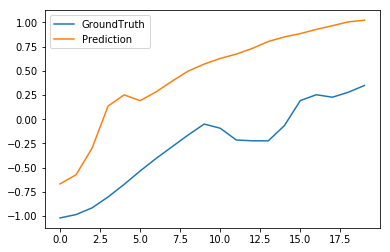

In [92]:
plt.figure()
plt.plot(trues[0,:,-1], label='GroundTruth')
plt.plot(preds[0,:,-1], label='Prediction')
plt.legend()
plt.show()

## 예측

### 테스트 데이터 변환

In [17]:
test = test.reset_index()
test = test.rename(columns={'index':'date'})
# 예측할 컬럼이 있어야한다,
test['pressure'] = 0

In [106]:
import datetime

def change_index_to_date(value):
    date = datetime.datetime.fromtimestamp(int(value)).strftime('%Y-%m-%d %H:%M:%S')
    return date

test.date = test.date.apply(lambda x: change_index_to_date(x))
test.drop('id', axis=1, inplace=True)
test

,date,breath_id,R,C,time_step,u_in,u_out,pressure
0,1970-01-01 09:00:00,0,5,20,0.000000,0.000000,0,0
1,1970-01-01 09:00:01,0,5,20,0.031904,7.515046,0,0
2,1970-01-01 09:00:02,0,5,20,0.063827,14.651675,0,0
3,1970-01-01 09:00:03,0,5,20,0.095751,21.230610,0,0
4,1970-01-01 09:00:04,0,5,20,0.127644,26.320956,0,0
5,1970-01-01 09:00:05,0,5,20,0.159557,30.486938,0,0
6,1970-01-01 09:00:06,0,5,20,0.191471,33.545950,0,0
7,1970-01-01 09:00:07,0,5,20,0.223402,35.717600,0,0
8,1970-01-01 09:00:08,0,5,20,0.255337,36.971061,0,0
9,1970-01-01 09:00:09,0,5,20,0.287230,37.542219,0,0


In [109]:
!pwd

/home/ubuntu/jonghee/gitclone/Informer2020


In [108]:
test.to_csv('../../dataset/sample_test.csv', index=False)
pd.read_csv('../../dataset/sample_test.csv')

,date,breath_id,R,C,time_step,u_in,u_out,pressure
0,1970-01-01 09:00:00,0,5,20,0.000000,0.000000,0,0
1,1970-01-01 09:00:01,0,5,20,0.031904,7.515046,0,0
2,1970-01-01 09:00:02,0,5,20,0.063827,14.651675,0,0
3,1970-01-01 09:00:03,0,5,20,0.095751,21.230610,0,0
4,1970-01-01 09:00:04,0,5,20,0.127644,26.320956,0,0
5,1970-01-01 09:00:05,0,5,20,0.159557,30.486938,0,0
6,1970-01-01 09:00:06,0,5,20,0.191471,33.545950,0,0
7,1970-01-01 09:00:07,0,5,20,0.223402,35.717600,0,0
8,1970-01-01 09:00:08,0,5,20,0.255337,36.971061,0,0
9,1970-01-01 09:00:09,0,5,20,0.287230,37.542219,0,0


## 테스트 데이터 예측

In [18]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'custom' # data
args.root_path = '../../dataset/' # root path of data file
args.data_path = 'sample_train.csv' # data file
args.features = 'MS' # forecasting task, options:[M, S, MS]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'pressure' # target feature in S or MS task
args.freq = 's' # freq for time features encoding, options:[s:secondly, t:minutely, h:hourly, d:daily, b:business days, w:weekly, m:monthly], you can also use more detailed freq like 15min or 3h
args.checkpoints = './informer_checkpoints' # location of model checkpoints

args.seq_len = 80 # input sequence length of Informer encoder, 한 breath_id마다 80개의 데이터라서
args.label_len = 40 # start token length of Informer decoder, 예제 코드보니까 seq_len의 반이라서...
args.pred_len = 20 # prediction sequence length, 이건 또 label_len의 반이라서...
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

args.enc_in = 7 # encoder input size
args.dec_in = 7 # decoder input size
args.c_out = 1 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 2 # num of encoder layers
args.d_layers = 1 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 's' # 오잉 왜 h로 돼있었지??

args.batch_size = 32 # 아래에 에러나서 32로 줄여봤다.
args.learning_rate = 0.0001
args.loss = 'mae'
args.lradj = 'type1'
args.use_amp = False # whether to use automatic mixed precision training

args.num_workers = 0
args.itr = 1
args.train_epochs = 5
args.patience = 3
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0

args.use_multi_gpu = True
args.devices = '0,1'


In [19]:
from data.data_loader import Dataset_Custom
from torch.utils.data import DataLoader
import pandas as pd
import os

In [20]:
# custom data: xxx.csv
# data features: ['date', ...(other features), target feature]

# we take ETTh2 as an example
args.root_path = '../../dataset/'
args.data_path = 'sample_test.csv'

df = pd.read_csv(os.path.join(args.root_path, args.data_path))

In [21]:
args.target = 'pressure'
args.freq = 's'

Data = Dataset_Custom
timeenc = 0 if args.embed!='timeF' else 1
flag = 'test'; shuffle_flag = False; drop_last = True; batch_size = 1

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    timeenc=timeenc,
    target=args.target, # HULL here, 우리는 pressure다.
    freq=args.freq # 'h': hourly, 't':minutely, 우리는 s다.
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [22]:
import os

args.output_attention = True

exp = Exp(args)

model = exp.model

setting = 'informer_custom_ftMS_sl80_ll40_pl20_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_0'
path = os.path.join(args.checkpoints,setting,'checkpoint.pth')
model.load_state_dict(torch.load(path))

Use GPU: cuda:0


<All keys matched successfully>

In [23]:
args

{'model': 'informer',
 'data': 'custom',
 'root_path': '../../dataset/',
 'data_path': 'sample_test.csv',
 'features': 'MS',
 'target': 'pressure',
 'freq': 's',
 'checkpoints': './informer_checkpoints',
 'seq_len': 80,
 'label_len': 40,
 'pred_len': 20,
 'enc_in': 7,
 'dec_in': 7,
 'c_out': 1,
 'factor': 5,
 'd_model': 512,
 'n_heads': 8,
 'e_layers': 2,
 'd_layers': 1,
 'd_ff': 2048,
 'dropout': 0.05,
 'attn': 'prob',
 'embed': 'timeF',
 'activation': 'gelu',
 'distil': True,
 'output_attention': True,
 'mix': True,
 'padding': 0,
 'batch_size': 32,
 'learning_rate': 0.0001,
 'loss': 'mae',
 'lradj': 'type1',
 'use_amp': False,
 'num_workers': 0,
 'itr': 1,
 'train_epochs': 5,
 'patience': 3,
 'des': 'exp',
 'use_gpu': True,
 'gpu': 0,
 'use_multi_gpu': True,
 'devices': '0,1'}

In [24]:
# here is the detailed code of function predict

def predict(exp, setting, load=False):
    pred_data, pred_loader = data_set, data_loader
        
    if load:
        path = os.path.join(exp.args.checkpoints, setting)
        best_model_path = path+'/'+'checkpoint.pth'
        exp.model.load_state_dict(torch.load(best_model_path))

    exp.model.eval()
        
    preds = []
        
    for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(pred_loader):
        batch_x = batch_x.float().to(exp.device)
        batch_y = batch_y.float()
        batch_x_mark = batch_x_mark.float().to(exp.device)
        batch_y_mark = batch_y_mark.float().to(exp.device)

        # decoder input
        if exp.args.padding==0:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        elif exp.args.padding==1:
            dec_inp = torch.ones([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        else:
            dec_inp = torch.zeros([batch_y.shape[0], exp.args.pred_len, batch_y.shape[-1]]).float()
        dec_inp = torch.cat([batch_y[:,:exp.args.label_len,:], dec_inp], dim=1).float().to(exp.device)
        # encoder - decoder
        if exp.args.use_amp:
            with torch.cuda.amp.autocast():
                if exp.args.output_attention:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
                else:
                    outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        else:
            if exp.args.output_attention:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
            else:
                outputs = exp.model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
        f_dim = -1 if exp.args.features=='MS' else 0
        batch_y = batch_y[:,-exp.args.pred_len:,f_dim:].to(exp.device)
        
        pred = outputs.detach().cpu().numpy()#.squeeze()
        
        preds.append(pred)

    preds = np.array(preds)
    preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])
    
    # result save
    folder_path = './results/' + setting +'/'
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    np.save(folder_path+'real_prediction.npy', preds)
    
    return preds

In [26]:
# GPU 에러 
# https://wsshin.tistory.com/12

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [25]:
prediction = predict(exp, setting, True)

RuntimeError: Caught RuntimeError in replica 0 on device 0.
Original Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/jh_p37/lib/python3.6/site-packages/torch/nn/parallel/parallel_apply.py", line 60, in _worker
    output = module(*input, **kwargs)
  File "/home/ubuntu/anaconda3/envs/jh_p37/lib/python3.6/site-packages/torch/nn/modules/module.py", line 532, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/ubuntu/jonghee/gitclone/Informer2020/models/model.py", line 70, in forward
    enc_out, attns = self.encoder(enc_out, attn_mask=enc_self_mask)
  File "/home/ubuntu/anaconda3/envs/jh_p37/lib/python3.6/site-packages/torch/nn/modules/module.py", line 532, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/ubuntu/jonghee/gitclone/Informer2020/models/encoder.py", line 68, in forward
    x, attn = attn_layer(x, attn_mask=attn_mask)
  File "/home/ubuntu/anaconda3/envs/jh_p37/lib/python3.6/site-packages/torch/nn/modules/module.py", line 532, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/ubuntu/jonghee/gitclone/Informer2020/models/encoder.py", line 46, in forward
    attn_mask = attn_mask
  File "/home/ubuntu/anaconda3/envs/jh_p37/lib/python3.6/site-packages/torch/nn/modules/module.py", line 532, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/ubuntu/jonghee/gitclone/Informer2020/models/attn.py", line 157, in forward
    attn_mask
  File "/home/ubuntu/anaconda3/envs/jh_p37/lib/python3.6/site-packages/torch/nn/modules/module.py", line 532, in __call__
    result = self.forward(*input, **kwargs)
  File "/home/ubuntu/jonghee/gitclone/Informer2020/models/attn.py", line 123, in forward
    context, attn = self._update_context(context, values, scores_top, index, L_Q, attn_mask)
  File "/home/ubuntu/jonghee/gitclone/Informer2020/models/attn.py", line 92, in _update_context
    index, :] = torch.matmul(attn, V).type_as(context_in)
RuntimeError: CUDA error: device-side assert triggered
